In [17]:
import pandas as pd
import numpy as np

In [2]:
air=pd.read_csv(r"C:\Users\pawas\Downloads\airquality.csv")

In [3]:
air.shape

(153, 7)

In [4]:
air.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [5]:
air.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
5,6,28.0,NaN,14.9,66,5,6
6,7,23.0,299.0,8.6,65,5,7
7,8,19.0,99.0,13.8,59,5,8
8,9,8.0,19.0,20.1,61,5,9
9,10,NaN,194.0,8.6,69,5,10


In [6]:
air.count()

Unnamed: 0    153
Ozone         116
Solar.R       146
Wind          153
Temp          153
Month         153
Day           153
dtype: int64

In [8]:
air.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [9]:
air.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [10]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


In [11]:
A=air.dropna()

In [12]:
A.shape

(111, 7)

In [13]:
A=air.fillna(0)

In [14]:
A.shape

(153, 7)

In [15]:
#error correcting
A=air.fillna(method='pad')

In [16]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,18.0,313.0,14.3,56,5,5


In [20]:
A=air['Ozone'].replace(np.NaN,air['Ozone'].mean())

In [21]:
A.head()

0    41.00000
1    36.00000
2    12.00000
3    18.00000
4    42.12931
Name: Ozone, dtype: float64

In [22]:
A=air['Ozone'].replace(np.NaN,air['Ozone'].median())

In [23]:
A.head()

0    41.0
1    36.0
2    12.0
3    18.0
4    31.5
Name: Ozone, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [26]:
A=imp.fit_transform(air)

In [27]:
A

array([[  1.,  41., 190., ...,  67.,   5.,   1.],
       [  2.,  36., 118., ...,  72.,   5.,   2.],
       [  3.,  12., 149., ...,  74.,   5.,   3.],
       ...,
       [151.,  14., 191., ...,  75.,   9.,  28.],
       [152.,  18., 131., ...,  76.,   9.,  29.],
       [153.,  20., 223., ...,  68.,   9.,  30.]])

In [28]:
A=pd.DataFrame(A,columns=air.columns)

In [29]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1.0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,2.0,36.00000,118.000000,8.0,72.0,5.0,2.0
2,3.0,12.00000,149.000000,12.6,74.0,5.0,3.0
3,4.0,18.00000,313.000000,11.5,62.0,5.0,4.0
4,5.0,42.12931,185.931507,14.3,56.0,5.0,5.0


In [30]:
#model building
from sklearn.model_selection import train_test_split

In [31]:
len(A)

153

In [32]:
train,test=train_test_split(A)

In [33]:
len(train)

114

In [34]:
len(test)

39

In [35]:
train.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
73,74.0,27.00000,175.0,14.9,81.0,7.0,13.0
129,130.0,20.00000,252.0,10.9,80.0,9.0,7.0
28,29.0,45.00000,252.0,14.9,81.0,5.0,29.0
32,33.0,42.12931,287.0,9.7,74.0,6.0,2.0
104,105.0,28.00000,273.0,11.5,82.0,8.0,13.0


In [37]:
train,test=train_test_split(A,test_size=0.20)

In [39]:
len(test)

31

In [40]:
len(train)


122

In [41]:
A.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler() #standardize features by removing the mean and scaling into

In [45]:
B=scaler.fit_transform(A)


In [48]:
pd.DataFrame(B).describe()

,0,1,2,3,4,5,6
count,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02
mean,9.288140e-17,-2.322035e-17,-1.741526e-17,-2.322035e-17,7.430512e-16,0.000000,-6.966105e-17
std,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284,1.003284e+00
min,-1.720767e+00,-1.438115e+00,-2.040912e+00,-2.351584e+00,-2.319450e+00,-1.411916,-1.675504e+00
25%,-8.603835e-01,-7.388013e-01,-7.520217e-01,-7.283322e-01,-6.235080e-01,-0.703643,-8.832458e-01
50%,0.000000e+00,0.000000e+00,9.203008e-02,-7.333578e-02,1.184665e-01,0.004629,2.219211e-02
75%,8.603835e-01,1.353414e-01,7.992086e-01,4.392701e-01,7.544446e-01,0.712902,8.144503e-01
max,1.720767e+00,4.401158e+00,1.688885e+00,3.059256e+00,2.026401e+00,1.421174,1.719888e+00


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler()

In [51]:
B=scaler.fit_transform(A)

In [52]:
pd.DataFrame(B).describe()

,0,1,2,3,4,5,6
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.500000,0.246283,0.547191,0.434606,0.533716,0.498366,0.493464
std,0.291522,0.171817,0.268992,0.185421,0.230860,0.354131,0.295484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.119760,0.345566,0.300000,0.390244,0.250000,0.233333
50%,0.500000,0.246283,0.571865,0.421053,0.560976,0.500000,0.500000
75%,0.750000,0.269461,0.761468,0.515789,0.707317,0.750000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
#binarization
B=pd.DataFrame(B).describe()

In [54]:
from sklearn.preprocessing import Binarizer

In [55]:
bin=Binarizer(threshold=0.5)

In [56]:
B=bin.fit_transform(B)

In [57]:
pd.DataFrame(B)

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
data=pd.read_csv(r"C:\Users\pawas\Downloads\heart.csv")

In [62]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()

In [64]:
B=le.fit_transform(data['cp'])

In [65]:
B

array([3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0, 2,
       0, 2, 3, 1, 2, 2, 2, 2, 1, 0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 3, 0, 2, 1, 3, 1, 2, 0,
       2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 3, 3, 1, 2, 2, 2, 3, 0, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 3, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 3, 2, 2, 0, 0, 3, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0,

In [66]:
B=data[:]

In [67]:
B['cp']=le.fit_transform(B['cp'])

In [68]:
B

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
#model building
from sklearn.linear_model import LinearRegression

In [70]:
X=A['Ozone'].values

In [72]:
X=X.reshape(-1,1)

In [73]:
X

array([[ 41.        ],
       [ 36.        ],
       [ 12.        ],
       [ 18.        ],
       [ 42.12931034],
       [ 28.        ],
       [ 23.        ],
       [ 19.        ],
       [  8.        ],
       [ 42.12931034],
       [  7.        ],
       [ 16.        ],
       [ 11.        ],
       [ 14.        ],
       [ 18.        ],
       [ 14.        ],
       [ 34.        ],
       [  6.        ],
       [ 30.        ],
       [ 11.        ],
       [  1.        ],
       [ 11.        ],
       [  4.        ],
       [ 32.        ],
       [ 42.12931034],
       [ 42.12931034],
       [ 42.12931034],
       [ 23.        ],
       [ 45.        ],
       [115.        ],
       [ 37.        ],
       [ 42.12931034],
       [ 42.12931034],
       [ 42.12931034],
       [ 42.12931034],
       [ 42.12931034],
       [ 42.12931034],
       [ 29.        ],
       [ 42.12931034],
       [ 71.        ],
       [ 39.        ],
       [ 42.12931034],
       [ 42.12931034],
       [ 23

In [74]:
Y=A['Temp']

In [75]:
model=LinearRegression()

In [77]:
model.fit(X,Y)

LinearRegression()

In [78]:
model.score(X,Y)*100

37.056682983646425

In [80]:
model.predict([[128]])

array([95.12601986])

In [81]:
import matplotlib.pyplot as plt

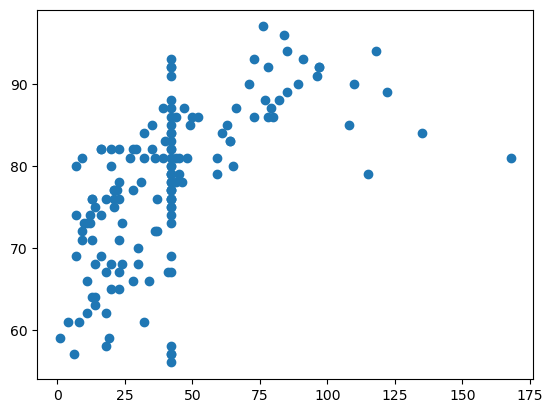

In [82]:
plt.scatter(X,Y)